# Dog Rates Project
 The dataset that I will be wrangling, analyzing, and visualizing is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "[they're good dogs Brent.](https://knowyourmeme.com/memes/theyre-good-dogs-brent)" WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for I to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

Image Predictions File
One more cool thing: Udacity ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images) and all of them on this URL "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv".

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data I find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called 'tweet_json.txt' file. 

## Gather


In [1]:
from io import StringIO
import pandas as pd
import numpy as np
import requests 
import tweepy
import json

In [2]:
#First I load the Twitter archive csv as data frame twitter_archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Second I load Image predictionis file from the url using requests library 
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
res = response.content
image_predictions = pd.read_csv(StringIO(res.decode()), sep= '\t')

In [ ]:
# Third data I load each tweet's retweet cont and favorite count at minimu and any additional data I finding interesting using Twitter API "Tweepy"
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#get tweet_id, retweet_count, and favorite_count from text "tweet_json.txt" and put them in data frame call "tweet_json"
tweet_json = []
with open('tweet_json.txt', 'r') as infile:
    for line in infile:
        line = json.loads(line)
        tweet_id = line['id']
        retweet_count = line['retweet_count']
        favorite_count = line['favorite_count']
        tweet_json.append({'tweet_id': tweet_id, 'retweet_count': retweet_count,'favorite_count': favorite_count})
tweet_json = pd.DataFrame(tweet_json)

## Assess
#### Visual Assessment

In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
twitter_archive.duplicated().sum()

0

In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
image_predictions.duplicated().sum()

0

In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [12]:
tweet_json

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


#### Programmatic Assessmen

In [13]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
590,799297110730567681,NaN,NaN,2016-11-17 17:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's quite the jokester. Take...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799297110...,11,10,Jeffrey,None,None,None,None
1974,673148804208660480,NaN,NaN,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fletcher. He's had a ruff night. No mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,None,None,pupper,None
1021,746726898085036033,NaN,NaN,2016-06-25 15:29:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Abby. She's incredibly distracting. Just ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746726898...,12,10,Abby,None,None,None,None
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None
1033,745074613265149952,NaN,NaN,2016-06-21 02:03:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Jeffrey. He wasn't prepared to execute...,NaN,NaN,NaN,https://vine.co/v/iQm3JAXuFmv,11,10,Jeffrey,None,None,None,None


In [14]:
twitter_archive.query("doggo != 'None'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None


In [15]:
twitter_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [16]:
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [17]:
twitter_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [18]:
twitter_archive.query('(rating_numerator >= 20 and rating_numerator <= 1776) or rating_numerator == 0')[['text','rating_numerator', 'rating_denominator']].values

array([['@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research',
        420, 10],
       ['@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10',
        666, 10],
       ['@markhoppus 182/10', 182, 10],
       ["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
        960, 0],
       ["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
        0, 10],
       ["RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
        75, 10],
       ['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
        84, 70],
       ['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and shari

In [19]:
twitter_archive.query('(rating_denominator >= 11 and rating_denominator <= 170 )or( rating_denominator == 0) or (rating_denominator == 2) or (rating_denominator == 7)')[['text','rating_numerator', 'rating_denominator']].values

array([["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
        960, 0],
       ['@docmisterio account started on 11/15/15', 11, 15],
       ['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
        84, 70],
       ['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
        24, 7],
       ['RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
        9, 11],
       ['Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
        165, 150],
       ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
        9, 11],
       ['Say hello to this unbelievably we

In [20]:
sum(twitter_archive.expanded_urls.isnull())

59

In [21]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
475,675149409102012420,https://pbs.twimg.com/media/CV6czeEWEAEdChp.jpg,1,chow,0.999876,True,Tibetan_mastiff,0.000059,True,Tibetan_terrier,0.000029,True
1592,798673117451325440,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
719,685906723014619143,https://pbs.twimg.com/media/CYTUhn7WkAEXocW.jpg,1,Yorkshire_terrier,0.414963,True,briard,0.063505,True,Pekinese,0.053682,True
1597,799063482566066176,https://pbs.twimg.com/media/CxbX_n2WIAAHaLS.jpg,2,Norfolk_terrier,0.334436,True,Norwich_terrier,0.231573,True,Australian_terrier,0.214203,True
1973,869702957897576449,https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg,1,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True


In [22]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
tweet_json.sample(5)

,favorite_count,retweet_count,tweet_id
169,35553,14740,859074603037188101
1131,3032,757,728751179681943552
636,27597,10723,793286476301799424
381,0,13517,827228250799742977
1006,4065,1205,747594051852075008


In [24]:
tweet_json.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [25]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
Buddy           7
an              7
Toby            7
Daisy           7
Bailey          7
Jack            6
Bella           6
Leo             6
Rusty           6
Koda            6
Oscar           6
Milo            6
Dave            6
Scout           6
Stanley         6
Jax             6
Bentley         5
             ... 
Longfellow      1
Bayley          1
Banditt         1
Monster         1
Jersey          1
Kobe            1
Stuart          1
Jackie          1
Hector          1
Mya             1
Butters         1
Link            1
Robin           1
Rascal          1
Jay             1
Tom             1
Grady           1
Ashleigh        1
Tessa           1
Bert            1
Marq            1
Daniel          1
Doobert         1
Jo              1
Jangle    

### Quality

#### twitter_archive table
- Check if there missing values in columns(in_reply_to_status_id, in_reply_to_use_id, retweeted_status_id, retweeted_user_id, retweeted_status_timestamp, expanded_urls) from tweet_json.txt
- Fill the missing values in columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,  expanded_urls).
- Erroneous datatypes(tweet_id, in_reply_to_staus_id, in_reply_to_use_id, retweeted_staus_id, retweeted_user_id, retweeted_status_timestamp, timestamp, timestamp)
- Rating numerator have some values are unexpected 20~1776 
- Rating denominator have some values are unexpected equal 2, 0, 7, (11~170)
- different twitter ratios have different ratio between nuerator and denominator.
- Name columns some variables equal "a", "an", "the"
- index equal 342 the value of numerator and denomiantor are wrong because this date

#### image_predictions table
- Erroneous datatypes(tweet_id)

#### tweet_json table
- Erroneous datatypes(tweet_id)

### Tidness
- make p1, p2, and p3 in one column in p and p1_conf,p2_conf, and p3_conf in conf column and P1_dog, p2_dog , P3_dog in p_dog column and name the column dog_kind_predictions
- concat tweet_json and twitter_archive table and name it twitter_archive

## Clean

In [26]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Missing Data
**Check if there missing values in columns(in_reply_to_status_id, in_reply_to_use_id, retweeted_status_id, retweeted_user_id, retweeted_status_timestamp, expanded_urls) from tweet_json.txt**

#### Define

Make dataframe have these values from tweet_json.txt then put the values from the dataframe to twitter_archive dataframe

#### Code

In [27]:
missing_values = []
with open('tweet_json.txt', 'r') as infile:
    for line in infile:
        line = json.loads(line)
        id_ = line['id']
        if line.get('in_reply_to_status_id'):
            in_reply_to_status_id = line['in_reply_to_status_id']
            in_reply_to_user_id = line['in_reply_to_user_id']
        else:
            in_reply_to_status_id = None
            in_reply_to_user_id = None
        
        if line.get('retweeted_status'):
            retweeted_status_id = line['retweeted_status']['id']
            retweeted_user_id =  line['retweeted_status']['user']['id']
            retweeted_status_timestamp = line['retweeted_status']['created_at']
        else:
            retweeted_status_id = None
            retweeted_user_id = None
            retweeted_status_timestamp = None
            
        if line['entities'].get('media'):
            expanded_url = line['entities']['media'][0].get('expanded_url')
        else:
            expanded_url = None
        missing_values.append({'tweet_id': id_,
                               'in_reply_to_status_id': in_reply_to_status_id, 
                               'in_reply_to_user_id': in_reply_to_user_id,
                               'retweeted_status_id': retweeted_status_id,
                               'retweeted_user_id': retweeted_user_id,
                               'retweeted_status_timestamp': retweeted_status_timestamp,
                               'expanded_urls' : expanded_url})
missing_values = pd.DataFrame(missing_values)

#### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
missing_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
expanded_urls                 2073 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
retweeted_status_id           179 non-null float64
retweeted_status_timestamp    179 non-null object
retweeted_user_id             179 non-null float64
tweet_id                      2354 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 128.8+ KB


**Fill the missing values in columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,  expanded_urls).**
#### Define
From last error I fill missing values by remove NaN and put 'None' string for all missing values in this columns

#### Code

In [30]:
#check if all values in missing data dataframe reply columns in twitter_archive_clean " reply columns"
for i in  missing_values[~missing_values.in_reply_to_status_id.isnull()].tweet_id.values :
    if i not in twitter_archive_clean[~twitter_archive_clean.in_reply_to_status_id.isnull()].tweet_id.values:
        print('This tweet_id has value in reply columns in missing values and don\'t in twitter_archive: {}'.format(i))

In [31]:
#check if all values in missing data dataframe reply columns in twitter_archive_clean "expanded url"
for i in missing_values[~missing_values.expanded_urls.isnull()].tweet_id.values :
    if i not in twitter_archive_clean[~twitter_archive_clean.expanded_urls.isnull()].tweet_id.values:
        print('This tweet_id has value in expanded url column in missing values and don\'t in twitter_archive: {}'.format(i))

In [32]:
#check if all values in missing data dataframe reply columns in twitter_archive_clean "reply columns"
for i in missing_values[~missing_values.retweeted_status_id.isnull()].tweet_id.values :
    if i not in twitter_archive_clean[~twitter_archive_clean.retweeted_status_id.isnull()].tweet_id.values:
        print(i)
        print('This tweet_id has value in etweeted columns in missing values and don\'t in twitter_archive: {}'.format(i))

Then all null values in twitter_archive dataframe are None for example only non nulls in the in_reply... column are not reply tweets.

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tidness
**make p1, p2, and p3 in one column in p and p1_conf,p2_conf, and p3_conf in conf column and P1_dog, p2_dog , P3_dog in p_dog column and name the column dog_kind_predictions**

#### Define
make function to calculate for each row the best prediction for the image of dog then apply it for image_predictions_clean and then produce the kind of dog and prediction configuration and drop columns(p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)

#### Code

In [34]:
def image_pred(row):
    if row['p1_dog'] and row['p1_conf'] >= row['p2_conf'] and row['p1_conf'] >= row['p3_conf']:
        return row['p1'], row['p1_conf'], '1'
    elif row['p2_dog'] and row['p2_conf'] >= row['p3_conf']:
        return row['p2'], row['p2_conf'], '2'
    elif row['p3_dog']:
        return row['p3'], row['p3_conf'], '3'
    else:
        return 'none_dog',None , None
image_predict = image_predictions_clean.apply(image_pred, axis= 1)

In [35]:
image_predictions_clean['prediction_level'] = image_predict.str[2]
image_predictions_clean['dog_kind_prediction'] = image_predict.str[0]
image_predictions_clean['prediction_configuration'] = image_predict.str[1]
image_predictions_clean = image_predictions_clean.drop(columns = [ 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

#### Test

In [36]:
image_predictions_clean

,tweet_id,jpg_url,img_num,prediction_level,dog_kind_prediction,prediction_configuration
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,1,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,None,none_dog,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,1,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,3,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,1,miniature_poodle,0.201493


**concat tweet_json and twitter_archive table and name it twitter_archive**
#### Define
concat twitter_archive_clean and tweet_json_clean on tweet_id columns one_to_one

#### Code

In [37]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean, on='tweet_id', how='outer', validate="one_to_one")

#### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

In [39]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,41048.0,9774.0


### Quality
**in twitter archive dataframe Erroneous datatypes(tweet_id, in_reply_to_staus_id, in_reply_to_use_id, retweeted_staus_id, retweeted_user_id, retweeted_status_timestamp, timestamp)**

#### Define
Convert tweet_id, in_reply_to_staus_id, in_reply_to_use_id, retweeted_staus_id, retweeted_user_id to string data types. Convert timestamp and retweeted_status_timestamp to datetime data type. 

#### Code

In [40]:
#To string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype(str)
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype(str)
# To datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

#### Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_coun

In [42]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467.0,8853.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819.0,6514.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461.0,4328.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908.0,8964.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,41048.0,9774.0
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,20562.0,3261.0
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,12041.0,2158.0
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,56848.0,16716.0
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,28226.0,4429.0
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,32467.0,7711.0


**twitter_archive_clean dataframe Rating numerator have some values are unexpected 20~1776 and Rating denominator have some values are unexpected equal 2, 0, 7, (11~170) and different twitter ratios have different ratio between nuerator and denominator.**
#### Define
Define the all values of the rating numerator and rating denominator from the text to get the true value of rating because some tweets have date and this make some values not true by make the first if the the denominator equal 10 else any value make the excat true the calculate the rating by divide the rating numerator over the rating denominator.

#### Code

In [43]:
correct_ratio_value =twitter_archive_clean.text.str.extract(r'(\d+?\.?\d*\/[1][0])')
correct_ratio_value[correct_ratio_value[0].isnull()] = twitter_archive_clean.loc[correct_ratio_value[correct_ratio_value[0].isnull()].index,:].text.str.extract(r'(\d*\/?\d+?\/\d+)')
twitter_archive_clean['rating_numerator'] = correct_ratio_value[0].str.extract(r'((\d+?\.?\d*)\/(\d*?\/?\d+))')[1].astype('float')
twitter_archive_clean['rating_denominator'] = correct_ratio_value[0].str.extract(r'((\d+?\.?\d*)\/(\d*?\/?\d+))')[2].astype('float')
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator/twitter_archive_clean.rating_denominator 

#### Test

In [44]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,39467.0,8853.0,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,33819.0,6514.0,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,25461.0,4328.0,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,42908.0,8964.0,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,41048.0,9774.0,1.2
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,20562.0,3261.0,1.3
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,12041.0,2158.0,1.3
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaT,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None,56848.0,16716.0,1.3
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,28226.0,4429.0,1.3
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,32467.0,7711.0,1.4


In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_

In [46]:
twitter_archive_clean.rating.sort_values()

315       0.000000
1016      0.000000
1869      0.100000
605       0.100000
2091      0.100000
2261      0.100000
2338      0.100000
2038      0.100000
1446      0.100000
1940      0.100000
1920      0.200000
2237      0.200000
2310      0.200000
1761      0.200000
1598      0.200000
2246      0.200000
2349      0.200000
2079      0.200000
1764      0.200000
2326      0.200000
2305      0.300000
1249      0.300000
1898      0.300000
1314      0.300000
765       0.300000
2183      0.300000
2202      0.300000
1947      0.300000
1938      0.300000
1478      0.300000
           ...    
784       1.400000
448       1.400000
449       1.400000
76        1.400000
110       1.400000
426       1.400000
418       1.400000
184       1.400000
185       1.400000
123       1.400000
186       1.400000
395       1.400000
924       1.400000
490       1.400000
187       1.400000
56        1.400000
404       1.400000
64        1.400000
117       1.400000
68        1.400000
78        1.400000
285       1.

In [47]:
twitter_archive_clean.rating.describe()

count    2356.000000
mean        1.217112
std         4.078152
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

**Name columns some variables equal "a", "an", "the"**
#### Define 
Make list have the three values ["a","an","the"] then make for loof if for each value and replace it to None value.
#### Code

In [48]:
error_name = ["a","an","the"]
for i in error_name:
    twitter_archive_clean.replace(i, "None",inplace= True)

#### Test

In [49]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,39467.0,8853.0,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,33819.0,6514.0,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,25461.0,4328.0,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,42908.0,8964.0,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,41048.0,9774.0,1.2
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,20562.0,3261.0,1.3
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,12041.0,2158.0,1.3
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaT,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None,56848.0,16716.0,1.3
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,28226.0,4429.0,1.3
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,32467.0,7711.0,1.4


In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_

In [51]:
twitter_archive_clean.name.value_counts()

None         815
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
Daisy          7
Bailey         7
Buddy          7
Toby           7
Scout          6
Koda           6
Rusty          6
Oscar          6
Dave           6
Stanley        6
Bella          6
Milo           6
Leo            6
Jax            6
Jack           6
Larry          5
Sunny          5
Sammy          5
Chester        5
            ... 
by             1
Edgar          1
Enchilada      1
Colin          1
Jockson        1
Trip           1
Jomathan       1
Sparky         1
Fido           1
Hermione       1
Tommy          1
Kial           1
Lacy           1
my             1
Brandi         1
Jameson        1
Rueben         1
Blipson        1
Bones          1
Grizzwald      1
Nimbus         1
Frönq          1
Jaycob         1
Deacon         1
Willie         1
Mookie         1
Harnold        1
Gilbert       

**index equal 342 the value of numerator and denomiantor are wrong because this date**
#### Define 
make the value in the rating , rating numerator, and denomiantor equal None

#### Code

In [52]:
twitter_archive_clean.loc[342,:]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                     8.320875475599974e+17
in_reply_to_user_id                                                  30582082.0
timestamp                                                   2017-02-16 04:45:50
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         nan
retweeted_status_user_id                                                    nan
retweeted_status_timestamp                                                  NaT
expanded_urls                                                               NaN
rating_numerator                                                             11
rating_denominator                                                           15
name                                    

In [53]:
twitter_archive_clean.loc[342,['rating_numerator','rating_denominator','rating']] = None, None, None

#### Test

In [54]:
twitter_archive_clean.loc[342,:]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                     8.320875475599974e+17
in_reply_to_user_id                                                  30582082.0
timestamp                                                   2017-02-16 04:45:50
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         nan
retweeted_status_user_id                                                    nan
retweeted_status_timestamp                                                  NaT
expanded_urls                                                               NaN
rating_numerator                                                            NaN
rating_denominator                                                          NaN
name                                    

**image_predictions table Erroneous datatypes(tweet_id)**
#### Define
make the dataypes of tweet_id column string
#### Code

In [55]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

#### Test

In [56]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id                    2075 non-null object
jpg_url                     2075 non-null object
img_num                     2075 non-null int64
prediction_level            1751 non-null object
dog_kind_prediction         2075 non-null object
prediction_configuration    1751 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 97.3+ KB


### Assessing Again

In [57]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,dog_kind_prediction,prediction_configuration
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311


In [58]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id                    2075 non-null object
jpg_url                     2075 non-null object
img_num                     2075 non-null int64
prediction_level            1751 non-null object
dog_kind_prediction         2075 non-null object
prediction_configuration    1751 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 97.3+ KB


In [59]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,39467.0,8853.0,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,33819.0,6514.0,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,25461.0,4328.0,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,42908.0,8964.0,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,41048.0,9774.0,1.2


In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2355 non-null float64
rating_denominator            2355 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_

In [61]:
twitter_archive_clean[twitter_archive_clean.favorite_count.isnull()].values

array([['888202515573088257', 'nan', 'nan',
        Timestamp('2017-07-21 01:02:36'),
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        'RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX',
        '8.874739571039519e+17', '4196983835.0',
        Timestamp('2017-07-19 00:47:34'),
        'https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1',
        13.0, 10.0, 'Canela', 'None', 'None', 'None', 'None', nan, nan,
        1.3],
       ['771004394259247104', 'nan', 'nan',
        Timestamp('2016-08-31 15:19:06'),
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        'RT @katieornah: @dog_rates learning a


#### Quality

##### image_predictions_clean table
- Erroneous datatypes(prediction_level, dog_kind_prediction)

##### twitter_archive_clean table
- favorite_count and retweet_count columns have two missing values tweet_ids(888202515573088257,771004394259247104)
- Erroneous datatypes(favorite_count, retweet_count)

**image_predictions_clean table Erroneous datatypes(prediction_level, dog_kind_prediction, img_num)**
#### Define
change the datatype of prediction_level, dog_kind_prediction, and img_num columns to category datatype
#### Code

In [62]:
image_predictions_clean.prediction_level = image_predictions_clean.prediction_level.astype('category')
image_predictions_clean.dog_kind_prediction = image_predictions_clean.dog_kind_prediction.astype('category')
image_predictions_clean.img_num = image_predictions_clean.img_num.astype('category')

#### Test

In [63]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id                    2075 non-null object
jpg_url                     2075 non-null object
img_num                     2075 non-null category
prediction_level            1751 non-null category
dog_kind_prediction         2075 non-null category
prediction_configuration    1751 non-null float64
dtypes: category(3), float64(1), object(2)
memory usage: 61.0+ KB


In [64]:
image_predictions_clean

,tweet_id,jpg_url,img_num,prediction_level,dog_kind_prediction,prediction_configuration
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,1,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN,none_dog,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,1,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,3,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,1,miniature_poodle,0.201493


**twitter_archive_clean table favorite_count and retweet_count columns have two missing values tweet_ids(888202515573088257,771004394259247104)**
#### Define
get from expanded url the first url and select only the tweet url and get the index from the the values are null and then get the html code then export the true values
#### Code

In [65]:
from bs4 import BeautifulSoup

In [67]:
urls = []
tweet_index = twitter_archive_clean[twitter_archive_clean.favorite_count.isnull()].index
tweet_expanded_urls = twitter_archive_clean[twitter_archive_clean.favorite_count.isnull()].expanded_urls.values
for i in tweet_expanded_urls:
    photo_url = i.split(',')[0]
    urls.append(photo_url[:photo_url.find('/',-15)])

for counter, url in enumerate(urls):
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    twitter_archive_clean.loc[tweet_index[counter], 'favorite_count'] = int(soup.find("li",class_= "js-stat-count js-stat-favorites stat-count").find("a").find("strong").contents[0].replace(',',''))
    twitter_archive_clean.loc[tweet_index[counter], 'retweet_count'] = int(soup.find('li',class_ ="js-stat-count js-stat-retweets stat-count").find("a").find("strong").contents[0].replace(',',''))


#### Test

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2355 non-null float64
rating_denominator            2355 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_

In [69]:
twitter_archive_clean[twitter_archive_clean.favorite_count.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,rating


In [70]:
twitter_archive_clean.loc[tweet_index]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,rating
19,888202515573088257,nan,nan,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874739571039519e+17,4196983835.0,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13.0,10.0,Canela,None,None,None,None,67442.0,17666.0,1.3
815,771004394259247104,nan,nan,2016-08-31 15:19:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710021304507433e+17,1732729088.0,2016-08-31 15:10:07,https://twitter.com/katieornah/status/77100213...,12.0,10.0,None,None,None,pupper,None,2281.0,236.0,1.2


**twitter_archive_clean table Erroneous datatypes(favorite_count, retweet_count)**
#### Define 
change the datatypes for favorite_count and retweet_count columns form float to int
#### Code

In [71]:
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype(int)
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype(int)

#### Test

In [72]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2355 non-null float64
rating_denominator            2355 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_

In [73]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,39467,8853,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,33819,6514,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,25461,4328,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,42908,8964,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,41048,9774,1.2
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,20562,3261,1.3
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,12041,2158,1.3
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaT,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None,56848,16716,1.3
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,28226,4429,1.3
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,32467,7711,1.4


In [74]:
#export the clean data to database
from sqlalchemy import create_engine

engine = create_engine('sqlite:///twitter_archive_master.db')
twitter_archive_clean.to_sql('master',engine, index = False)
image_predictions_clean.to_sql('image_predictions',engine, index = False)

## Data Analysis 
#### what's the relation between rating and number of favorite the tweet?

In [84]:
import matplotlib.pyplot as plt
% matplotlib inline

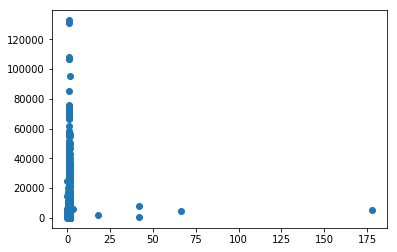

In [91]:
twitter_master_gather = pd.read_sql('SELECT*FROM master', engine)
plt.scatter(twitter_master_gather.rating, twitter_master_gather.favorite_count)

Text(0,0.5,'Tweet Favorite Count')

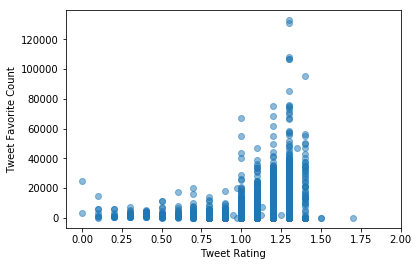

In [95]:
plt.scatter(twitter_master_gather.rating, twitter_master_gather.favorite_count,alpha = 0.5)
plt.xlim(-0.1, 2)
plt.xlabel('Tweet Rating')
plt.ylabel('Tweet Favorite Count')

I see from scatter plots the relation between tweet rating and favorite count when the rating between 10/10 to 14/10 the number of favorite is the most of maximam value and when the rate increaseing or decreaseing because any thing make comic tweet or joke tweet these make less number of favorite compare to the other rating value.

#### what's the relation between rating and number of retweet the tweet?

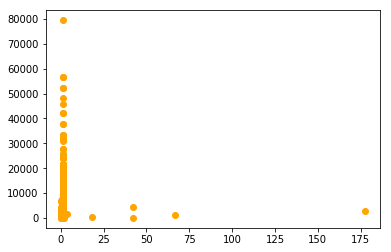

In [97]:
plt.scatter(twitter_master_gather.rating, twitter_master_gather.retweet_count, c = 'orange')

Text(0,0.5,'Tweet Retweet Count')

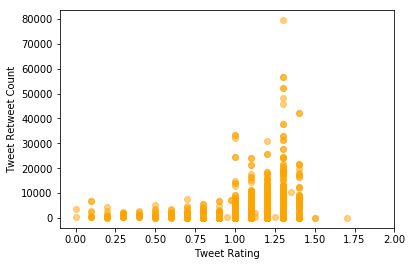

In [100]:
plt.scatter(twitter_master_gather.rating, twitter_master_gather.retweet_count, c = 'orange', alpha = 0.5)
plt.xlim(-0.1, 2)
plt.xlabel('Tweet Rating')
plt.ylabel('Tweet Retweet Count')

I see from the scatter plot the relation between tweet rading and retweet count is the same the relation between the tweet rading and retweet count but the number of retweet the tweet is less the number of favorite.
#### what's the kind of dog from picture have most rating averge and have most averge no. of favorite  and retweet ?

In [107]:
# join the two table by SQL code to make insghit from the data
join_tables_t_img = pd.read_sql('SELECT AVG(m.rating), AVG(m.favorite_count), AVG(m.retweet_count), ip.dog_kind_prediction  FROM master m JOIN image_predictions ip ON m.tweet_id = ip.tweet_id GROUP BY ip.dog_kind_prediction', engine)
join_tables_t_img

,AVG(m.rating),AVG(m.favorite_count),AVG(m.retweet_count),dog_kind_prediction
0,1.050000,12995.000000,7162.750000,Afghan_hound
1,0.983333,5280.833333,1393.750000,Airedale
2,1.031250,9380.187500,2310.812500,American_Staffordshire_terrier
3,1.100000,7317.500000,1458.000000,Appenzeller
4,1.150000,11127.500000,3078.500000,Australian_terrier
5,1.033333,21153.166667,7510.166667,Bedlington_terrier
6,1.127273,7284.000000,1616.545455,Bernese_mountain_dog
7,1.127273,8437.181818,2360.727273,Blenheim_spaniel
8,1.058333,8933.083333,2207.750000,Border_collie
9,1.214286,13578.000000,3377.142857,Border_terrier


In [111]:
#rename the name of columns 
join_tables_t_img.columns = ['avg_rating','avg_favorite_count','avg_retweet_count','dog_kind_prediction']

In [117]:
join_tables_t_img.query('avg_rating == @join_tables_t_img.avg_rating.max()')

,avg_rating,avg_favorite_count,avg_retweet_count,dog_kind_prediction
100,1.585802,6707.824074,2604.623457,none_dog


In [118]:
join_tables_t_img.query('avg_favorite_count == @join_tables_t_img.avg_favorite_count.max()')

,avg_rating,avg_favorite_count,avg_retweet_count,dog_kind_prediction
54,1.25,24060.0,5133.75,Saluki


In [119]:
join_tables_t_img.query('avg_retweet_count == @join_tables_t_img.avg_retweet_count.max()')

,avg_rating,avg_favorite_count,avg_retweet_count,dog_kind_prediction
107,1.1,12753.416667,8568.833333,standard_poodle


form the last codes we see the most of average of rating from the data when the see image prediction this non dirictly photo of dog because the result from the prediction none_dog and the kind of dog have the max. of averge favorite count is Saluki and the kind of dog have the max. of average retweet_count is Standard Poodle.